
# Project:Investigate TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I decide to investigate TMDB Movie Data, cleaned from the original dataset in Kaggle.

### Questions are: 
##### 1- What genres are the most popular?
##### 2- Does more budget mean more profit ?
##### 3- Is there a trend in the profit in relation with release year ?
##### 4- Are more popular movies more profitable ?
##### 5- Is longer movies more profitable than the shorter one ?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
First step is to load the data and take a glimpse to investigate it.


In [17]:
# Load the data to check the structure and columns
df = pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


There are 21 columns, some are useful and some not, we will take care of that in a minute. 

Now, we need to study the data further, checking null values, any duplicates and plan how to deal with them. 


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### 1- There are some columns like cast, homepage, director, tagline, keywords, overview, genre, production companies that have missing values.
###### 2- release date is object type, which is not very prolimatic as I will remove it, it's not interresting to me. 
###### 3- the columns with very large number of null value will be deleted as they will cause a lot of problems.


In [19]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

##### There are some good insights here, id column is more realistic that imdb_id so I will remove it. budget and revenue columns are to be removed as they are less realistic than budget_adj and revenue_adj columns. Let's go one step further.

In [20]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Woow, zero budgets, so weird. We remove those enteries of course. 

### Data Cleaning:

There are several data cleaning task that we have to do before we proceed to analyse the data:
1. Remove columns that are not needed for the analysis.
2. Drop duplicated row.
3. Drop rows where the budget or revenue adjusted value is 0
2. Drop row that have no genre and production companies information since it is small compared to the total number of data we have.



In [21]:
# dropping some columns
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'director','tagline', 'release_date'], axis=1, inplace=True)


In [22]:
# drop the duplicated values
df.drop_duplicates(inplace=True)

In [23]:
# dropping the rows with zero budget
df.drop(df[(df.budget_adj == 0)].index, inplace=True)

In [24]:
# drop rows with null genres and production compny
df.dropna(inplace=True, subset=['genres', 'production_companies'])

#### Let's check the data one more time. 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5032 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5032 non-null   int64  
 1   popularity            5032 non-null   float64
 2   original_title        5032 non-null   object 
 3   cast                  5024 non-null   object 
 4   runtime               5032 non-null   int64  
 5   genres                5032 non-null   object 
 6   production_companies  5032 non-null   object 
 7   vote_count            5032 non-null   int64  
 8   vote_average          5032 non-null   float64
 9   release_year          5032 non-null   int64  
 10  budget_adj            5032 non-null   float64
 11  revenue_adj           5032 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 511.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### 1- What genres are the most popular?

In [29]:
def get_median_profit_after_grouping_by_column(df, group_by_col):
    return df.groupby(group_by_col).median()['profit']

def get_mean_profit_after_grouping_by_column(df, group_by_col):
    return df.groupby(group_by_col).mean()['profit']    

def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

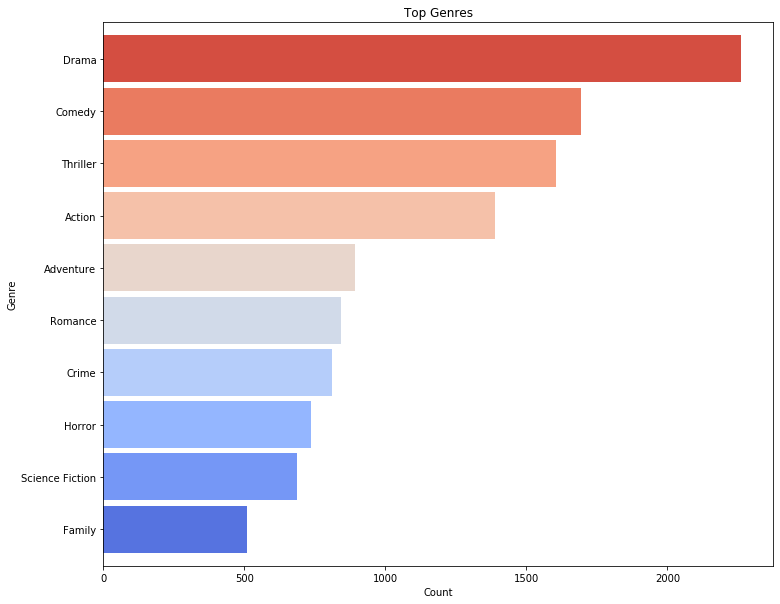

In [30]:

# Separate the genre based on the pipe (|).
genresList = df['genres'].str.split('|')

# Create list of genres
genres = []
for i in genresList:
    genres.extend(i)
    
# Plot based on the value counts
plt.subplots(figsize=(12,10))
pd.Series(genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
plt.title('Top Genres')
set_label('Count', 'Genre')
plt.show()

#### a litte surprising that, drama is the most popular among other genres. 

### 2-Does more budget mean more profit ?

In [31]:
# Get the profit values
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [32]:
df.profit.describe()

count    5.032000e+03
mean     6.718297e+07
std      1.763396e+08
min     -4.139124e+08
25%     -8.005555e+06
50%      4.669757e+06
75%      7.144782e+07
max      2.750137e+09
Name: profit, dtype: float64

It's quite surprising that at least 25% of the movie did not make profit.

Let's draw the scatter plot between budget and profit to see if there seems to be any correlation between them.

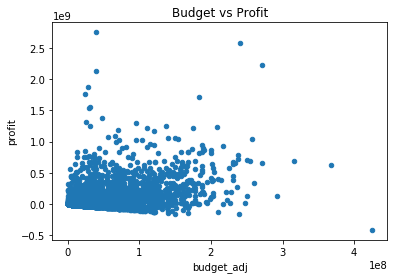

In [34]:
df.plot.scatter(x='budget_adj', y='profit', title='Budget vs Profit');

### Surprising enough, there is very week correlation between budget and profit, more budget doesn't mean more profit. 

### 3- Is there a trend in the profit in relation with release year ?

#### I will use the median to get an idea of how the profit changes over the year. The median is used not the mean to avoid any effect of outliers, as apparently there will be a large number of them. 

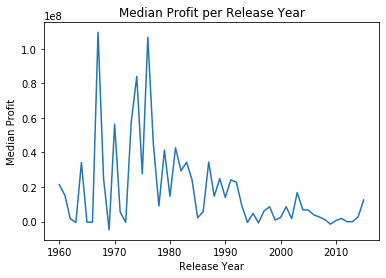

In [38]:
median_profit_per_release_year =  get_median_profit_after_grouping_by_column(df, 'release_year')
median_profit_per_release_year.plot(title='Median Profit per Release Year')
set_label('Release Year', 'Median Profit')

#### Movies released between 1970-1980 seems to make the most money. I guess that is becuase TV is was new that time or there was a lot of free time. After that, people got busier. 


### 4-Are more popular movies more profitable ?

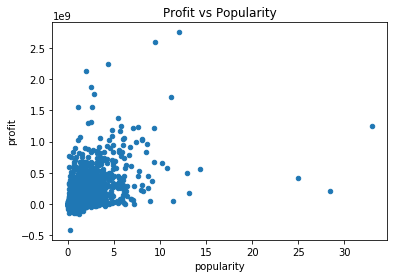

In [42]:
df.plot.scatter(x='popularity', y='profit', title='Profit vs Popularity');

##### Very surprising to me, popularity has week effect on the profit, most profit comes from low popular movies. 

### 5- Is longer movies more profitable than the shorter one ?

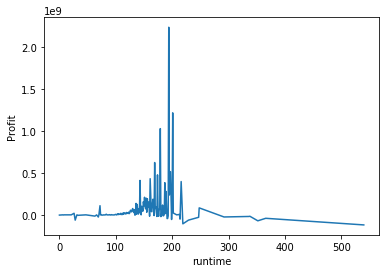

In [48]:
median_profit_per_runtime =  get_median_profit_after_grouping_by_column(df, 'runtime')
set_label( 'Run time', 'Profit')
median_profit_per_runtime.plot();

#### Apparently, shorter is better. Movie that makes more money are 200 minutes of runtime.

In [ ]:
### 6- Is there a relation between the profit and the vote ?

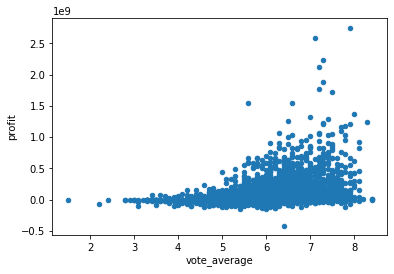

In [51]:
df.plot.scatter(x='vote_average', y='profit');

#### Not very surprising, people tend to look for movies with higher votes thus more profit. 

<a id='conclusions'></a>
## Conclusions

#### Movie Genre
     - Drama is the most popular genre followed by Comedy.

#### Profit Contributors
     - There are some important insights in relation to the factors that may affect the profit:
          1- It is not true that the higher the budget of the movie, the more profit it will make.
          2- The year the movie is made. The movie released on 1970 to 1980 seems to raised more money.
          3- It seems that popularity does not affect the profit much. 
          4- Votes affect the profit.
          5- Most popular and profitable movies are those with duration less than 200 minutes. 
#### Limitations: 
     - There are some limitations in regard to analysis of this set of data:
     
         1- The null and duplicated entries made me take some precautinary actions either removing them or replacing them, this could easily cause biases in a way or another. 
         2- Some data are misleading like zero budget that would be a great cause of misinterpretations of the data, and this needs to be investigated more. 
         3- We only analyze the portion of the data we have, there is no clue if this is comprehensive data or just a portion general conclusion would be biased and misleading if to take a general concepstion out of analyzing only a portion.